Starter file for Project 1 - need to load in Spotify CSV!


In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
csv_path = Path("Resources/spotify-2023.csv")

spotify_df = pd.read_csv(csv_path, encoding='iso-8859-1')

#Basic Dataframe with all information
spotify_df.head()

,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,artist_count,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,NaN,NaN,NaN,NaN,NaN,NaN,2,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# David!

In [4]:
#Austin!

In [5]:
# Dan

In [6]:
# Pull out specific columns into a dataframe for analyzing just the music qualities:
qualities_df = spotify_df[["track_name", "Artist Name 1", "streams", "bpm", "key", "mode", "danceability_%", "valence_%",	"energy_%",	"acousticness_%",	"instrumentalness_%",	"liveness_%",	"speechiness_%"]]

qualities_df

,track_name,Artist Name 1,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,141381703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,133716286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,140003974,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,800840817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,303236322,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,My Mind & Me,Selena Gomez,91473363,144,A,Major,60,24,39,57,0,8,3
948,Bigger Than The Whole Sky,Taylor Swift,121871870,166,F#,Major,42,7,24,83,1,12,6
949,A Veces (feat. Feid),Feid,73513683,92,C#,Major,80,81,67,4,0,8,6
950,En La De Ella,Feid,133895612,97,C#,Major,82,67,77,8,0,12,5


In [7]:
# General overview of values per column.
qualities_df.nunique()

track_name            940
Artist Name 1         457
streams               948
bpm                   124
key                    11
mode                    2
danceability_%         72
valence_%              94
energy_%               80
acousticness_%         98
instrumentalness_%     39
liveness_%             68
speechiness_%          48
dtype: int64

In [8]:
song_speed = qualities_df["bpm"].value_counts()

tempos = song_speed.index.tolist()

print(tempos)

[120, 140, 130, 92, 110, 150, 90, 122, 105, 125, 96, 95, 100, 98, 170, 94, 144, 124, 93, 118, 128, 134, 108, 107, 123, 80, 115, 145, 180, 135, 148, 101, 102, 160, 142, 121, 114, 126, 88, 116, 146, 138, 78, 133, 117, 84, 154, 104, 158, 97, 81, 174, 166, 132, 143, 85, 136, 172, 129, 82, 139, 103, 106, 176, 109, 83, 89, 119, 141, 147, 137, 112, 127, 87, 77, 99, 91, 164, 79, 113, 178, 152, 72, 71, 131, 173, 171, 162, 168, 175, 65, 206, 151, 157, 177, 186, 161, 76, 111, 156, 153, 202, 183, 169, 149, 155, 196, 188, 200, 189, 198, 184, 74, 75, 181, 73, 86, 179, 67, 182, 204, 192, 163, 165]


In [9]:
# Starting analysis on track speeds (beats per minute). My first thought was to see a general breakdown of number of songs by tempo.

total_songs = []
for song in song_speed:
    total_songs.append(song)

total_songs

[39,
 31,
 31,
 25,
 23,
 21,
 21,
 19,
 19,
 18,
 17,
 16,
 16,
 16,
 16,
 15,
 15,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

Standard Deviation of tempos: 37.462117528776375.
NormaltestResult(statistic=24.895167800638077, pvalue=3.927199818891401e-06)


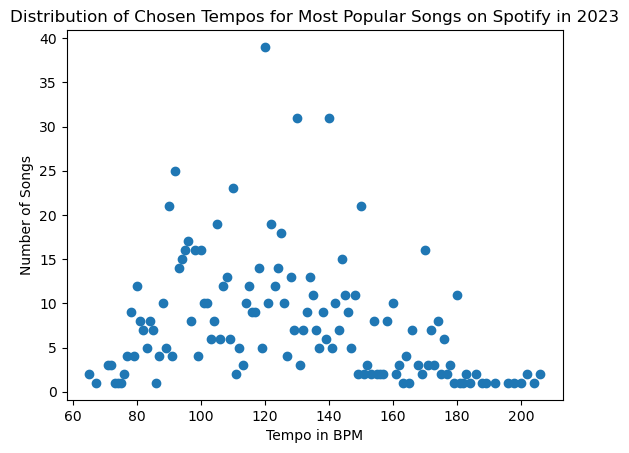

In [10]:


plt.scatter(tempos, total_songs)
plt.xlabel("Tempo in BPM")
plt.ylabel("Number of Songs")
plt.title("Distribution of Chosen Tempos for Most Popular Songs on Spotify in 2023")

std_dev = np.std(tempos)
print(f'Standard Deviation of tempos: {std_dev}.')
print(st.normaltest(tempos))
plt.show()




In [11]:
qualities_df

,track_name,Artist Name 1,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,141381703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,133716286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,140003974,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,800840817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,303236322,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,My Mind & Me,Selena Gomez,91473363,144,A,Major,60,24,39,57,0,8,3
948,Bigger Than The Whole Sky,Taylor Swift,121871870,166,F#,Major,42,7,24,83,1,12,6
949,A Veces (feat. Feid),Feid,73513683,92,C#,Major,80,81,67,4,0,8,6
950,En La De Ella,Feid,133895612,97,C#,Major,82,67,77,8,0,12,5


In [12]:
bins = [0, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 189, 199, 250]
group_names = ["Below 60", "60-69bpm", "70-79bpm", "80-89bpm", "90-99bpm", "100-109bpm", "110-119bpm",
                "120-129bpm", "130-139bpm", "140-149bpm", "150-159bpm", "160-169bpm", "170-179bpm", 
                "180-189bpm", "190-199bpm", "200+bpm"]

qualities_df["BPM Range"] = pd.cut(qualities_df["bpm"],
                         bins, labels=group_names,
                         include_lowest=True)

tempo_range = qualities_df["BPM Range"].sort_values()

C:\Users\danrk\AppData\Local\Temp\ipykernel_2344\404684906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualities_df["BPM Range"] = pd.cut(qualities_df["bpm"],


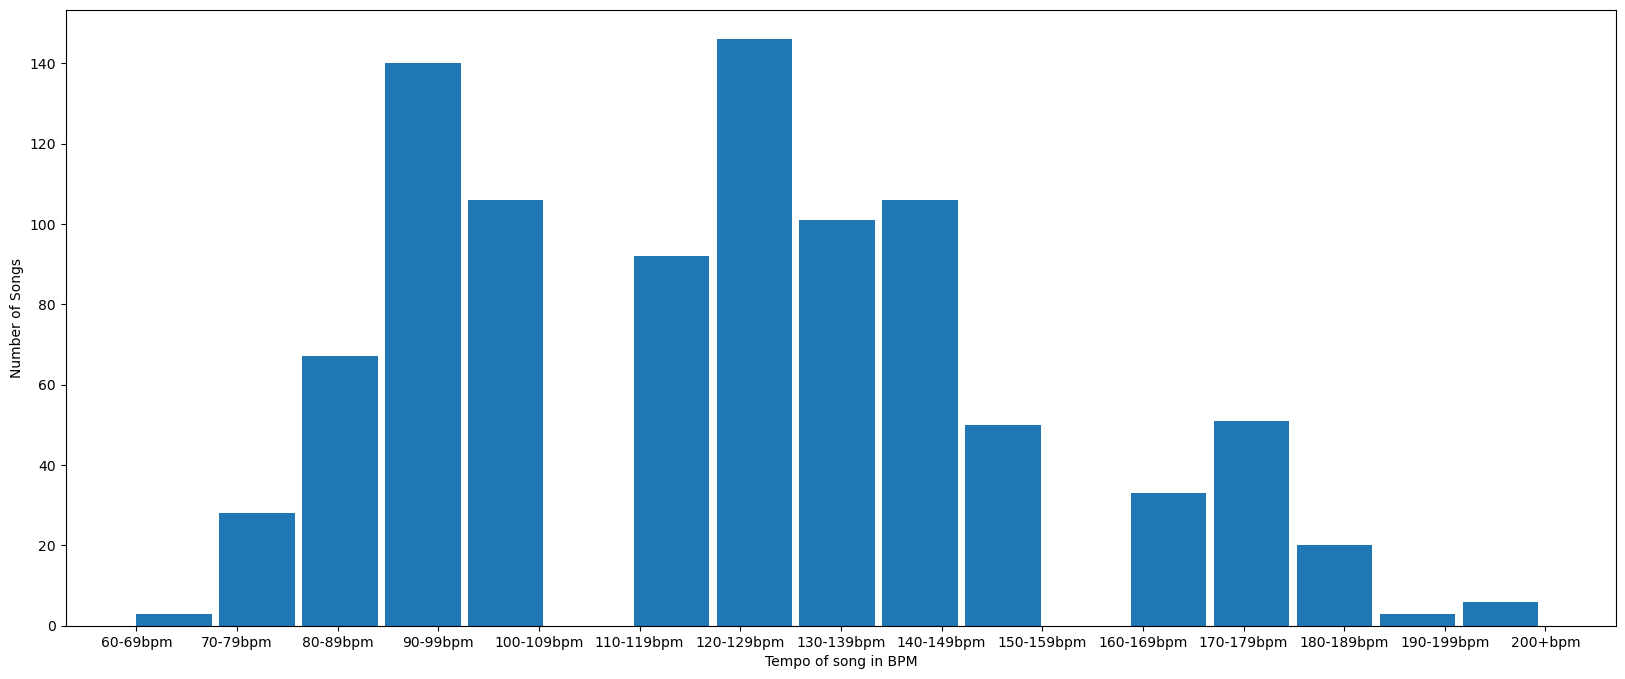

In [13]:

plt.figure(figsize=(20,8))
plt.hist(tempo_range, bins=len(bins), width=.75, align="mid")
plt.xlabel("Tempo of song in BPM")
plt.ylabel("Number of Songs")



plt.show()



In [14]:
z_scipy = st.zscore(tempos)
print(f'The z-scores using the SciPy module are {z_scipy}')

The z-scores using the SciPy module are [-0.30611569  0.22775696 -0.03917936 -1.0535374  -0.57305201  0.49469329
 -1.10692467 -0.25272842 -0.70652018 -0.17264753 -0.94676287 -0.9734565
 -0.83998834 -0.89337561  1.02856594 -1.00015014  0.33453149 -0.19934116
 -1.02684377 -0.35950295 -0.09256663  0.06759517 -0.62643928 -0.65313291
 -0.22603479 -1.37386099 -0.43958385  0.36122512  1.29550226  0.0942888
  0.44130602 -0.81329471 -0.78660108  0.76162961  0.28114423 -0.27942206
 -0.46627748 -0.14595389 -1.16031193 -0.41289022  0.38791876  0.1743697
 -1.42724826  0.04090153 -0.38619659 -1.26708646  0.60146782 -0.73321381
  0.70824235 -0.92006924 -1.34716736  1.13534047  0.92179141  0.0142079
  0.30783786 -1.24039283  0.12098243  1.0819532  -0.065873   -1.32047373
  0.20106333 -0.75990744 -0.67982655  1.18872773 -0.59974565 -1.29378009
 -1.1336183  -0.33280932  0.25445059  0.41461239  0.14767606 -0.51966475
 -0.11926026 -1.18700556 -1.45394189 -0.86668197 -1.08023103  0.86840414
 -1.40055462 -0

In [15]:
mean_numpy = np.mean(tempos)

print(mean_numpy)

#print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
#print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
#print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

131.46774193548387


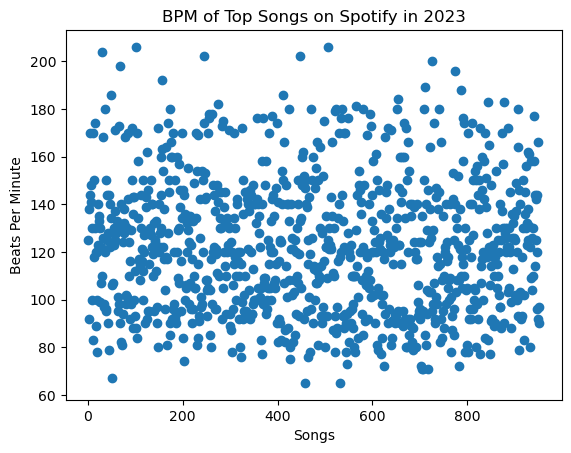

In [16]:
# In order to graph a scatter plot of all the tracks' tempos, I created a counter loop in order to assign a number to each track listing in the dataframe. This makes the scatter
# plot easier to read. The x-axis numbers are independent of the y-axis value - they simply mark individual tracks from the data set.

# While there is a large amount of variation in tempo selection, it is 
x_values = []
counter = 0

for row in qualities_df["track_name"]:

   counter = counter + 1

   x_values.append(counter)
  
y_values = qualities_df["bpm"]
plt.scatter(x_values, y_values)
plt.xlabel("Songs")
plt.ylabel("Beats Per Minute")
plt.title("BPM of Top Songs on Spotify in 2023")

plt.show()

In [17]:
popular_artists = qualities_df["Artist Name 1"].value_counts()

popular_artists.sort_values(ascending=False)

popular_artists.head(20)

Artist Name 1
Taylor Swift      36
The Weeknd        34
Bad Bunny         26
Kendrick Lamar    23
SZA               23
Drake             19
Harry Styles      17
Feid              15
Ed Sheeran        13
Morgan Wallen     12
Karol G            9
BTS                9
Eminem             9
Labrinth           8
Doja Cat           7
Olivia Rodrigo     7
Nicki Minaj        6
Post Malone        6
Justin Bieber      6
Kanye West         6
Name: count, dtype: int64

In [18]:
streams_df = qualities_df.groupby("Artist Name 1")["streams"].sum()

streams_df.sort_values(ascending=False).head(20)

Artist Name 1
The Weeknd          21516545916
Bad Bunny           15363784442
Ed Sheeran          14559679731
Taylor Swift        14423238266
Harry Styles        11608645649
Eminem              10193727260
Justin Bieber        8138018785
Drake                8043031261
Imagine Dragons      7719446948
Olivia Rodrigo       7442148916
Bruno Mars           7346351599
Dua Lipa             6935012279
SZA                  6493011189
Post Malone          6008998402
Arctic Monkeys       5569806731
Kendrick Lamar       5555903581
Doja Cat             5374950905
Billie Eilish        4972152341
Coldplay             4887142570
The Chainsmokers     4795304992
Name: streams, dtype: int64

In [19]:
top_artists = qualities_df.loc[(qualities_df["Artist Name 1"] == "Bad Bunny") |
                          (qualities_df["Artist Name 1"] == "The Weeknd") |
                          (qualities_df["Artist Name 1"] == "Ed Sheeran") |
                          (qualities_df["Artist Name 1"] == "Taylor Swift") |
                          (qualities_df["Artist Name 1"] == "Harry Styles") |
                          (qualities_df["Artist Name 1"] == "Eminem") |
                          (qualities_df["Artist Name 1"] == "Justin Bieber") |
                          (qualities_df["Artist Name 1"] == "Drake") |
                          (qualities_df["Artist Name 1"] == "Imagine Dragons") |
                          (qualities_df["Artist Name 1"] == "Olivia Rodrigo") |
                          (qualities_df["Artist Name 1"] == "Bruno Mars") |
                          (qualities_df["Artist Name 1"] == "Dua Lipa") |
                          (qualities_df["Artist Name 1"] == "SZA") |
                          (qualities_df["Artist Name 1"] == "Post Malone") |
                          (qualities_df["Artist Name 1"] == "Arctic Monkeys") |
                          (qualities_df["Artist Name 1"] == "Kendrick Lamar") |
                          (qualities_df["Artist Name 1"] == "Doja Cat") |
                          (qualities_df["Artist Name 1"] == "Billie Eilish") |
                          (qualities_df["Artist Name 1"] == "Coldplay") |
                          (qualities_df["Artist Name 1"] == "The Chainsmokers")]
                          
top_artists.sort_values(["Artist Name 1"])
                       

,track_name,Artist Name 1,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,BPM Range
134,505,Arctic Monkeys,1217120710,140,NaN,Major,52,20,85,0,0,7,5,140-149bpm
172,Do I Wanna Know?,Arctic Monkeys,1788326445,85,F,Major,55,42,53,17,0,22,3,80-89bpm
177,Whyd You Only Call Me When Youre High?,Arctic Monkeys,1267333350,92,D,Major,70,81,63,4,0,8,4,90-99bpm
22,I Wanna Be Yours,Arctic Monkeys,1297026226,135,NaN,Minor,48,44,42,12,2,11,3,130-139bpm
766,Un Ratito,Bad Bunny,417230415,93,NaN,Minor,79,22,55,31,0,12,5,90-99bpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Sacrifice,The Weeknd,326792833,122,G,Major,70,91,79,3,0,7,10,120-129bpm
371,After Hours,The Weeknd,698086140,109,F,Minor,66,16,57,10,1,12,3,100-109bpm
325,The Hills,The Weeknd,1947371785,136,NaN,Minor,36,12,57,9,0,14,8,130-139bpm
517,I Heard Youre Married (feat. Lil Wayne),The Weeknd,91656026,110,D,Major,75,85,84,10,0,31,19,110-119bpm


In [20]:
top_tempos = top_artists["bpm"].value_counts()

top_tempos = top_tempos.index.tolist()

print(top_tempos)

[90, 130, 108, 114, 140, 121, 134, 110, 120, 118, 144, 150, 142, 146, 96, 78, 136, 170, 107, 104, 92, 97, 160, 122, 125, 123, 103, 95, 100, 109, 126, 101, 124, 93, 164, 138, 115, 135, 171, 98, 65, 141, 80, 94, 87, 166, 83, 81, 152, 174, 105, 77, 99, 119, 116, 176, 153, 106, 82, 158, 143, 145, 85, 180, 168, 79, 117, 72, 88, 131, 165, 188, 137, 139, 183, 169, 173, 154, 148, 181, 129, 86, 111, 128, 76, 163, 162, 89, 186, 206, 84, 112, 177]


In [47]:
most_streamed_songs = []
for song in top_artists:
    most_streamed_songs.append(song)

most_streamed_songs

['track_name',
 'Artist Name 1',
 'streams',
 'bpm',
 'key',
 'mode',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%',
 'BPM Range']

In [22]:
top_artists["streams"].sum()

176946901763

In [23]:
qualities_df["streams"].sum()

489458828542

In [24]:
((top_artists["streams"].sum()) / (qualities_df["streams"].sum())) *100

36.151539505394034

In [25]:
len(top_artists["track_name"])

259

In [26]:
len(qualities_df["track_name"])

952

In [27]:
(len(top_artists["track_name"]) / len(qualities_df["track_name"])) * 100

27.205882352941174

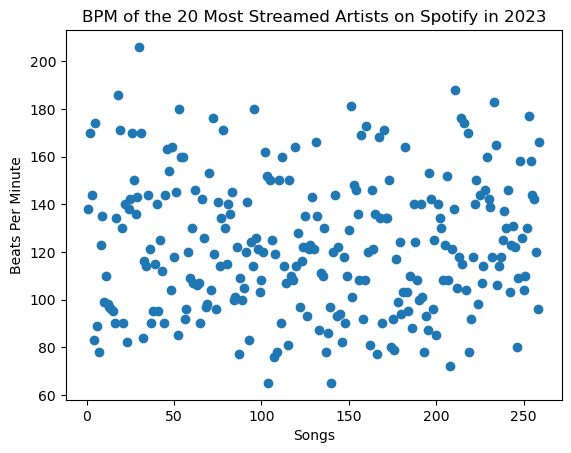

In [28]:
pop_x = []
counter = 0

for row in top_artists["track_name"]:

   counter = counter + 1

   pop_x.append(counter)


pop_y = top_artists["bpm"]
plt.scatter(pop_x, pop_y)
plt.xlabel("Songs")
plt.ylabel("Beats Per Minute")
plt.title("BPM of the 20 Most Streamed Artists on Spotify in 2023")

plt.show()

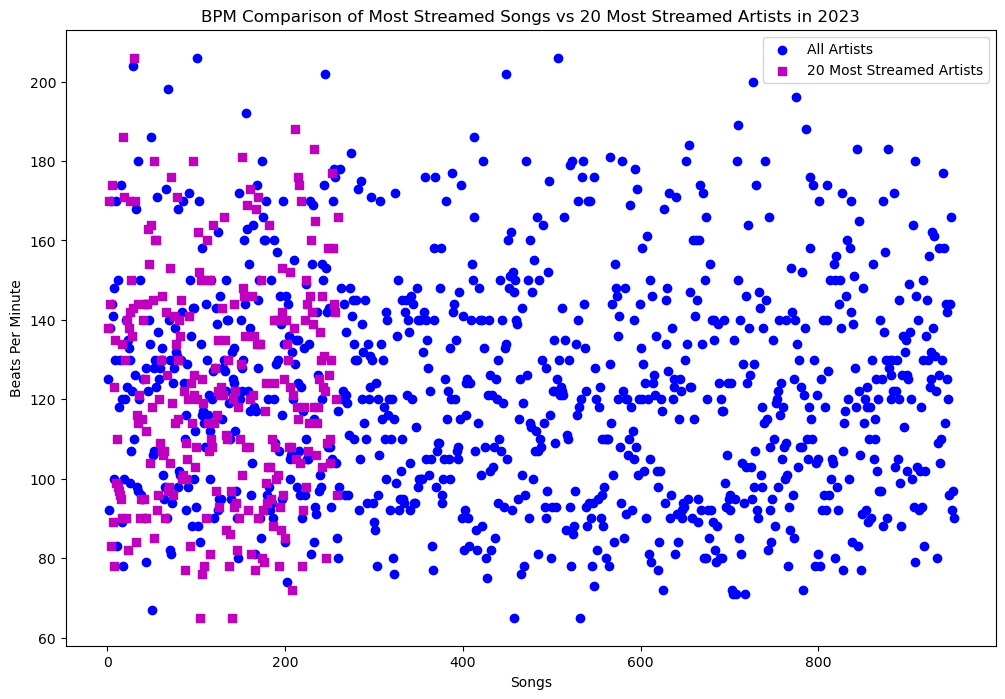

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x_values, y_values, c='b', marker='o', label="All Artists")
ax.scatter(pop_x, pop_y, c='m', marker="s", label="20 Most Streamed Artists")
ax.set_xlabel("Songs")
ax.set_ylabel("Beats Per Minute")
ax.set_title("BPM Comparison of Most Streamed Songs vs 20 Most Streamed Artists in 2023")
ax.legend(loc='upper right')

plt.savefig("Outputs/bpm_comparison.png")
plt.show()


In [30]:
print(f'The average BPM of all top songs from 2023 is {qualities_df["bpm"].mean()}.')
print(f'The average BPM of songs by the 20 most streamed artists in 2023 is {top_artists["bpm"].mean()}.')
print(f'--------------------------')
print(f'The median BPM of all top songs from 2023 is {qualities_df["bpm"].median()}.')
print(f'The median BPM of songs by the 20 most streamed artists in 2023 is {top_artists["bpm"].median()}.')
print(f'--------------------------')
print(f'The mode BPM of all top songs from 2023 is {qualities_df["bpm"].mode()}.')
print(f'The mode BPM of songs by the 20 most streamed artists in 2023 is {top_artists["bpm"].mode()}.')

The average BPM of all top songs from 2023 is 122.55357142857143.
The average BPM of songs by the 20 most streamed artists in 2023 is 122.58301158301158.
--------------------------
The median BPM of all top songs from 2023 is 121.0.
The median BPM of songs by the 20 most streamed artists in 2023 is 120.0.
--------------------------
The mode BPM of all top songs from 2023 is 0    120
Name: bpm, dtype: int64.
The mode BPM of songs by the 20 most streamed artists in 2023 is 0    90
Name: bpm, dtype: int64.


In [31]:
top_artists.loc[top_artists["bpm"] == 90].value_counts()


track_name                                     Artist Name 1  streams     bpm  key  mode   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%  BPM Range
F2F                                            SZA            67540165    90   D    Major  53              47         74        9               0                   34          4              90-99bpm     1
Karma                                          Taylor Swift   404562836   90   G#   Major  64              10         62        7               0                   48          7              90-99bpm     1
Karma (feat. Ice Spice)                        Taylor Swift   46142772    90   G#   Major  62              7          62        6               0                   58          6              90-99bpm     1
Stargirl Interlude                             The Weeknd     611700552   90   F    Minor  59              52         48        38              5                   10          11   

In [32]:
qualities_df.loc[qualities_df["bpm"] == 120].value_counts()

track_name                                                                  Artist Name 1      streams     bpm  key  mode   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%  BPM Range 
10:35                                                                       Tiesto             325592432   120  G#   Major  70              70         79        7               0                   18          10             120-129bpm    1
Swim                                                                        Chase Atlantic     498960285   120  G#   Major  67              8          54        27              0                   8           4              120-129bpm    1
Night Changes                                                               One Direction      1131090940  120  G#   Major  67              40         52        86              0                   12          4              120-129bpm    1
Ojos Marrones                                

In [33]:

all_mode = qualities_df.groupby(["Artist Name 1"])["mode"].value_counts()

all_modes = pd.DataFrame(all_mode.sort_values(ascending=False))

all_modes

count
Artist Name 1 mode        
Taylor Swift  Major     32
The Weeknd    Minor     18
              Major     16
SZA           Major     15
Bad Bunny     Major     14
...                    ...
John Legend   Major      1
              Minor      1
Jnr Choi      Major      1
Jin           Major      1
teto          Minor      1

[559 rows x 1 columns]

In [34]:
top_mode = top_artists.groupby(["Artist Name 1"])["mode"].value_counts()

top_modes = pd.DataFrame(top_mode.sort_values(ascending=False))

top_modes

count
Artist Name 1    mode        
Taylor Swift     Major     32
The Weeknd       Minor     18
                 Major     16
SZA              Major     15
Bad Bunny        Major     14
Kendrick Lamar   Minor     14
Harry Styles     Major     13
Bad Bunny        Minor     12
Drake            Minor     10
                 Major      9
Ed Sheeran       Major      9
Kendrick Lamar   Major      9
SZA              Minor      8
Post Malone      Major      6
Olivia Rodrigo   Major      5
Bruno Mars       Major      5
Eminem           Major      5
Taylor Swift     Minor      4
Justin Bieber    Major      4
Harry Styles     Minor      4
Eminem           Minor      4
Doja Cat         Major      4
Billie Eilish    Major      4
Ed Sheeran       Minor      4
Dua Lipa         Minor      4
Doja Cat         Minor      3
Coldplay         Major      3
Imagine Dragons  Minor      3
Arctic Monkeys   Major      3
Olivia Rodrigo   Minor      2
Dua Lipa         Major      2
Justin Bieber    Minor      2
Billie Eilish    Minor      2
Imagine Dragons  Major      2
Coldplay         Minor      1
Bruno Mars       Minor      1
The Chainsmokers Major      1
                 Minor      1
Arctic Monkeys   Minor      1

In [35]:
total_major = []
total_minor = []
major = 0
minor = 0

for row in qualities_df["mode"]:
    if row == "Major":
        major = major + 1
       
    elif row == "Minor":
        minor = minor + 1

total_major.append(major)
total_minor.append(minor)
print(total_major)
print(total_minor)

[549]
[403]


In [36]:
top_major = []
top_minor = []
t_major = 0
t_minor = 0

for row in top_artists["mode"]:
    if row == "Major":
        t_major = t_major + 1
       
    elif row == "Minor":
        t_minor = t_minor + 1

top_major.append(t_major)
top_minor.append(t_minor)
print(top_major)
print(top_minor)

[161]
[98]


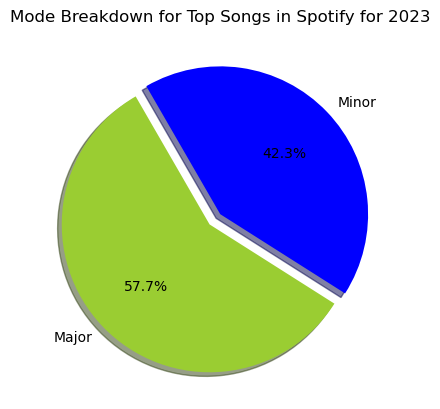

In [37]:
modes = ["Major", "Minor"]
total_modes = [549, 403]
explode = (0.1, 0)
colors = ["yellowgreen", "blue"]

plt.pie(total_modes, explode=explode, labels=modes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("Mode Breakdown for Top Songs in Spotify for 2023")

plt.savefig("Outputs/all_songs_modes.png")

plt.show()


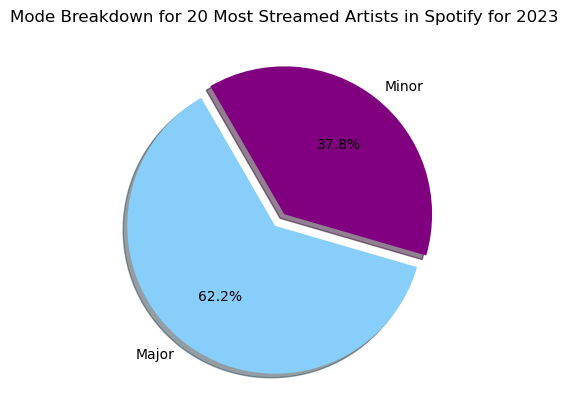

In [38]:
modes = ["Major", "Minor"]
top_modes = [161, 98]
explode = (0.1, 0)
colors = ["lightskyblue", "purple"]

plt.pie(top_modes, explode=explode, labels=modes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("Mode Breakdown for 20 Most Streamed Artists in Spotify for 2023")

plt.savefig("Outputs/top20_artists_modes.png")

plt.show()


In [39]:
print(f'The mean danceability % is {round(qualities_df["danceability_%"].mean(), 2)}.')
print(f'The median danceability % is {round(qualities_df["danceability_%"].median(), 2)}.')
print(f'The mode danceability % is {round(qualities_df["danceability_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean valence % is {round(qualities_df["valence_%"].mean(), 2)}.')
print(f'The median valence % is {round(qualities_df["valence_%"].median(), 2)}.')
print(f'The mode valence % is {round(qualities_df["valence_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean energy % is {round(qualities_df["energy_%"].mean(), 2)}.')
print(f'The median energy % is {round(qualities_df["energy_%"].median(), 2)}.')
print(f'The mode energy % is {round(qualities_df["energy_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean acousticness % is {round(qualities_df["acousticness_%"].mean(), 2)}.')
print(f'The median acousticness % is {round(qualities_df["acousticness_%"].median(), 2)}.')
print(f'The mode acousticness % is {round(qualities_df["acousticness_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean instrumentalness % is {round(qualities_df["instrumentalness_%"].mean(), 2)}.')
print(f'The median instrumentalness % is {round(qualities_df["instrumentalness_%"].median(), 2)}.')
print(f'The mode instrumentalness % is {round(qualities_df["instrumentalness_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean liveness % is {round(qualities_df["liveness_%"].mean(), 2)}.')
print(f'The median liveness % is {round(qualities_df["liveness_%"].median(), 2)}.')
print(f'The mode liveness % is {round(qualities_df["liveness_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean speechiness % is {round(qualities_df["speechiness_%"].mean(), 2)}.')
print(f'The median speechiness % is {round(qualities_df["speechiness_%"].median(), 2)}.')
print(f'The mode speechiness % is {round(qualities_df["speechiness_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean bpm is {round(qualities_df["bpm"].mean(), 2)}.')
print(f'The median bpm is {round(qualities_df["bpm"].median(), 2)}.')
print(f'The mode bpm is {round(qualities_df["bpm"].mode(), 2)}.')

The mean danceability % is 66.98.
The median danceability % is 69.0.
The mode danceability % is 0    70
Name: danceability_%, dtype: int64.
--------------------------
The mean valence % is 51.41.
The median valence % is 51.0.
The mode valence % is 0    24
Name: valence_%, dtype: int64.
--------------------------
The mean energy % is 64.27.
The median energy % is 66.0.
The mode energy % is 0    74
Name: energy_%, dtype: int64.
--------------------------
The mean acousticness % is 27.08.
The median acousticness % is 18.0.
The mode acousticness % is 0    0
Name: acousticness_%, dtype: int64.
--------------------------
The mean instrumentalness % is 1.58.
The median instrumentalness % is 0.0.
The mode instrumentalness % is 0    0
Name: instrumentalness_%, dtype: int64.
--------------------------
The mean liveness % is 18.21.
The median liveness % is 12.0.
The mode liveness % is 0    11
Name: liveness_%, dtype: int64.
--------------------------
The mean speechiness % is 10.14.
The median sp

In [40]:
print(f'The mean danceability % of songs by the 20 most streamed artists is {round(top_artists["danceability_%"].mean(), 2)}.')
print(f'The median danceability % of songs by the 20 most streamed artists is {round(top_artists["danceability_%"].median(), 2)}.')
print(f'The mode danceability % of songs by the 20 most streamed artists is {round(top_artists["danceability_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean valence % of songs by the 20 most streamed artists is {round(top_artists["valence_%"].mean(), 2)}.')
print(f'The median valence % of songs by the 20 most streamed artists is {round(top_artists["valence_%"].median(), 2)}.')
print(f'The mode valence % of songs by the 20 most streamed artists is {round(top_artists["valence_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean energy % of songs by the 20 most streamed artists is {round(top_artists["energy_%"].mean(), 2)}.')
print(f'The median energy % of songs by the 20 most streamed artists is {round(top_artists["energy_%"].median(), 2)}.')
print(f'The mode energy % of songs by the 20 most streamed artists is {round(top_artists["energy_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean acousticness % of songs by the 20 most streamed artists is {round(top_artists["acousticness_%"].mean(), 2)}.')
print(f'The median acousticness % of songs by the 20 most streamed artists is {round(top_artists["acousticness_%"].median(), 2)}.')
print(f'The mode acousticness % of songs by the 20 most streamed artists is {round(top_artists["acousticness_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean instrumentalness % of songs by the 20 most streamed artists is {round(top_artists["instrumentalness_%"].mean(), 2)}.')
print(f'The median instrumentalness % of songs by the 20 most streamed artists is {round(top_artists["instrumentalness_%"].median(), 2)}.')
print(f'The mode instrumentalness % of songs by the 20 most streamed artists is {round(top_artists["instrumentalness_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean liveness % of songs by the 20 most streamed artists is {round(top_artists["liveness_%"].mean(), 2)}.')
print(f'The median liveness % of songs by the 20 most streamed artists is {round(top_artists["liveness_%"].median(), 2)}.')
print(f'The mode liveness % of songs by the 20 most streamed artists is {round(top_artists["liveness_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean speechiness % of songs by the 20 most streamed artists is {round(top_artists["speechiness_%"].mean(), 2)}.')
print(f'The median speechiness % of songs by the 20 most streamed artists is {round(top_artists["speechiness_%"].median(), 2)}.')
print(f'The mode speechiness % of songs by the 20 most streamed artists is {round(top_artists["speechiness_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean bpm of songs by the 20 most streamed artists is {round(top_artists["bpm"].mean(), 2)}.')
print(f'The median bpm of songs by the 20 most streamed artists is {round(top_artists["bpm"].median(), 2)}.')
print(f'The mode bpm of songs by the 20 most streamed artists is {round(top_artists["bpm"].mode(), 2)}.')

The mean danceability % of songs by the 20 most streamed artists is 64.72.
The median danceability % of songs by the 20 most streamed artists is 65.0.
The mode danceability % of songs by the 20 most streamed artists is 0    56
1    70
Name: danceability_%, dtype: int64.
--------------------------
The mean valence % of songs by the 20 most streamed artists is 45.27.
The median valence % of songs by the 20 most streamed artists is 43.0.
The mode valence % of songs by the 20 most streamed artists is 0    42
Name: valence_%, dtype: int64.
--------------------------
The mean energy % of songs by the 20 most streamed artists is 60.12.
The median energy % of songs by the 20 most streamed artists is 62.0.
The mode energy % of songs by the 20 most streamed artists is 0    68
1    74
Name: energy_%, dtype: int64.
--------------------------
The mean acousticness % of songs by the 20 most streamed artists is 29.11.
The median acousticness % of songs by the 20 most streamed artists is 20.0.
The mod

In [41]:
all_chars = []
all_chars.append(round(qualities_df["danceability_%"].median(), 2))
all_chars.append(round(qualities_df["valence_%"].median(), 2))
all_chars.append(round(qualities_df["energy_%"].median(), 2))
all_chars.append(round(qualities_df["acousticness_%"].median(), 2))
all_chars.append(round(qualities_df["instrumentalness_%"].median(), 2))
all_chars.append(round(qualities_df["liveness_%"].median(), 2))
all_chars.append(round(qualities_df["speechiness_%"].median(), 2))


all_chars

[69.0, 51.0, 66.0, 18.0, 0.0, 12.0, 6.0]

In [42]:
top20_chars = []
top20_chars.append(round(top_artists["danceability_%"].median(), 2))
top20_chars.append(round(top_artists["valence_%"].median(), 2))
top20_chars.append(round(top_artists["energy_%"].median(), 2))
top20_chars.append(round(top_artists["acousticness_%"].median(), 2))
top20_chars.append(round(top_artists["instrumentalness_%"].median(), 2))
top20_chars.append(round(top_artists["liveness_%"].median(), 2))
top20_chars.append(round(top_artists["speechiness_%"].median(), 2))

top20_chars

[65.0, 43.0, 62.0, 20.0, 0.0, 13.0, 6.0]

C:\Users\danrk\AppData\Local\Temp\ipykernel_2344\3332453198.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(characteristics, rotation=45)
C:\Users\danrk\AppData\Local\Temp\ipykernel_2344\3332453198.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


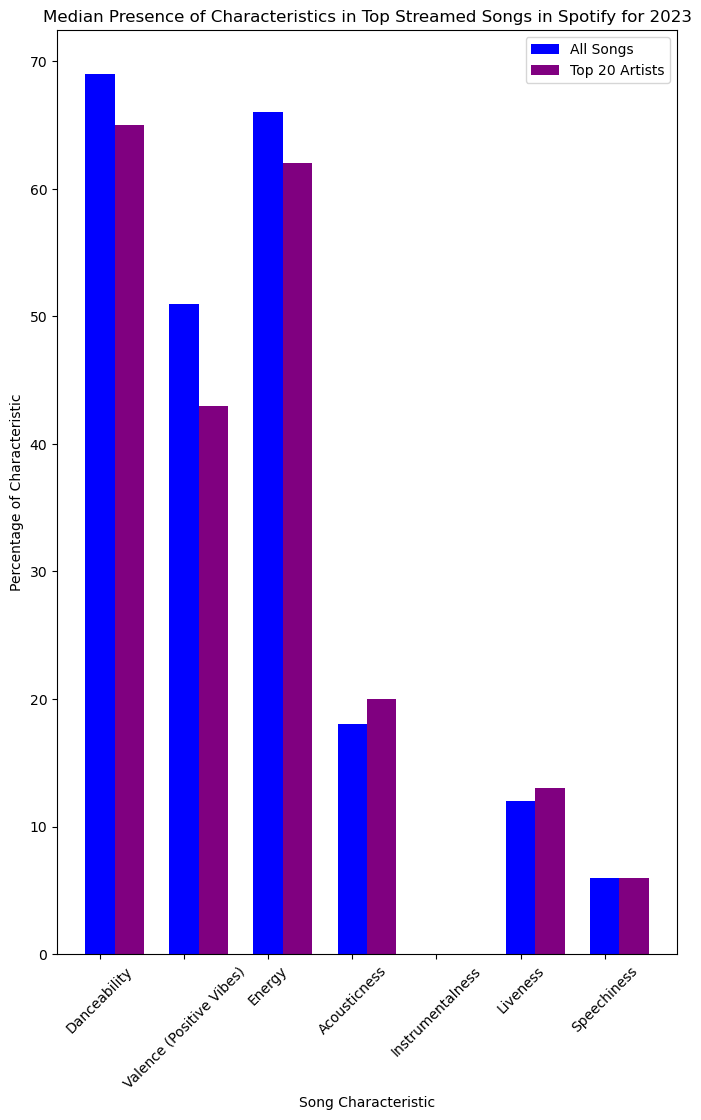

In [43]:
characteristics = ["Danceability", "Valence (Positive Vibes)","Energy","Acousticness",
                   "Instrumentalness","Liveness","Speechiness"]
bar_width = 0.35
fig, ax = plt.subplots(figsize=(8, 12))
bar1 = ax.bar(characteristics, all_chars, bar_width, label="All Songs", color='b')
bar2 = ax.bar([i + bar_width for i in range(len(characteristics))], top20_chars, 
              bar_width, label="Top 20 Artists", color='purple')
ax.set_title("Median Presence of Characteristics in Top Streamed Songs in Spotify for 2023")
ax.legend()
ax.set_xlabel("Song Characteristic")
ax.set_ylabel("Percentage of Characteristic")
ax.set_xticklabels(characteristics, rotation=45)
fig.savefig("Outputs/characteristics_medians_barchart.png")
fig.show()

In [44]:
all_modes = []
all_modes.append(qualities_df["danceability_%"].mode().iloc[0])
all_modes.append(qualities_df["valence_%"].mode().iloc[0])
all_modes.append(qualities_df["energy_%"].mode().iloc[0])
all_modes.append(qualities_df["acousticness_%"].mode().iloc[0])
all_modes.append(qualities_df["instrumentalness_%"].mode().iloc[0])
all_modes.append(qualities_df["liveness_%"].mode().iloc[0])
all_modes.append(qualities_df["speechiness_%"].mode().iloc[0])


all_modes

[70, 24, 74, 0, 0, 11, 4]

In [45]:
top20_modes = []
top20_modes.append(top_artists["danceability_%"].mode().iloc[0])
top20_modes.append(top_artists["valence_%"].mode().iloc[0])
top20_modes.append(top_artists["energy_%"].mode().iloc[0])
top20_modes.append(top_artists["acousticness_%"].mode().iloc[0])
top20_modes.append(top_artists["instrumentalness_%"].mode().iloc[0])
top20_modes.append(top_artists["liveness_%"].mode().iloc[0])
top20_modes.append(top_artists["speechiness_%"].mode().iloc[0])

top20_modes

[56, 42, 68, 1, 0, 11, 4]

C:\Users\danrk\AppData\Local\Temp\ipykernel_2344\1221819265.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(characteristics, rotation=45)
C:\Users\danrk\AppData\Local\Temp\ipykernel_2344\1221819265.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


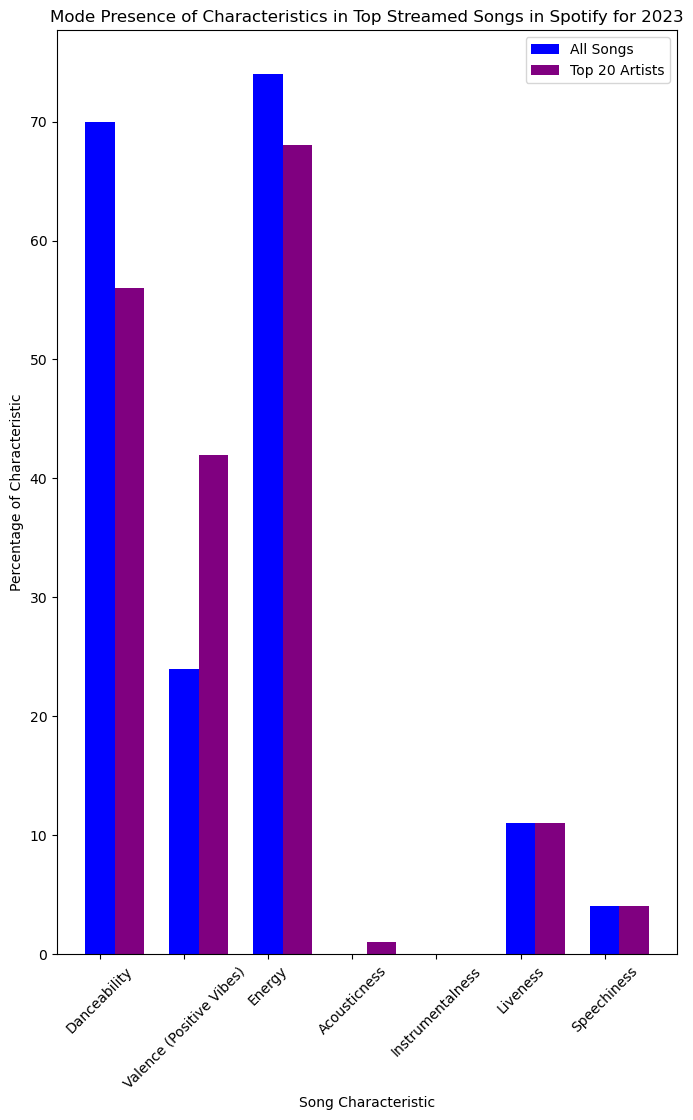

In [46]:
characteristics = ["Danceability", "Valence (Positive Vibes)","Energy","Acousticness",
                   "Instrumentalness","Liveness","Speechiness"]
bar_width = 0.35
fig, ax = plt.subplots(figsize=(8, 12))
bar1 = ax.bar(characteristics, all_modes, bar_width, label="All Songs", color='b')
bar2 = ax.bar([i + bar_width for i in range(len(characteristics))], top20_modes, 
              bar_width, label="Top 20 Artists", color='purple')
ax.set_title("Mode Presence of Characteristics in Top Streamed Songs in Spotify for 2023")
ax.legend()
ax.set_xlabel("Song Characteristic")
ax.set_ylabel("Percentage of Characteristic")
ax.set_xticklabels(characteristics, rotation=45)
fig.savefig("Outputs/characteristics_modes_barchart.png")
fig.show()